# 😵‍💫 Nahasmen-matrizeak

> Nahasmen-matrizea, matriz de confusión, confusion matrix, error matrix, ...

Nahasmen-matrizea sailkapenean erabiltzen den taula bat da, iragarpenak balio errealekin alderatzean eredu baten errendimendua erakusteko. Emaitzak benetako positiboetan **TP**, benetako negatiboetan **TN**, positibo faltsuetan **FP** eta negatibo faltsuetan **FN** banakatuz.

<img title="Nahasmen-matrizea" alt="Nahasmen matrizea teoria" src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2025/05/confusion_matrix-1.png" width="30%">

## 1. 📖 Edukiak definituz

Lehenik eta behin klase bat positibo gisa eta bestea negatibo gisa definitu behar da (Sailkapen bitarretan), adibidez minbizia aurresan:

- kasu benignoak $\rightarrow$ positiboak izango dira.
- minbizidunak $\rightarrow$ negatiboak.

---

Beraz, elementu bakoitza hurrengoa adieraziko du;
- **TP:** True Positive edo Benetako Positiboak, modeloak positiboa aurresandako eta, benetan, positiboak ziren kasuak dira.
- **FP:** False Positive edo Positibo Faltsuak, modeloak positiboa aurresandako, baina benetan negatiboak ziren kasuak dira. Normalean *okerren* kasua.
- **FN:** False Negative edo Negatibo Faltsuak, modeloak negatiboa aurresandako, baina benetan positiboak ziren kasuak dira.
- **TN:** True Negative edo Benetako Negatiboak, modeloak negatiboa aurresandako eta, benetan, negatiboak ziren kasuak dira.

In [1]:
# Hasierako importak
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

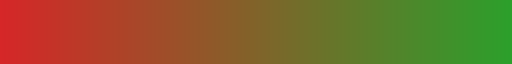

In [2]:
from matplotlib.colors import LinearSegmentedColormap
# kolore gradientea
custom_palette = LinearSegmentedColormap.from_list(
    name='eskala',
    colors=['tab:red','tab:green',]
)
custom_palette

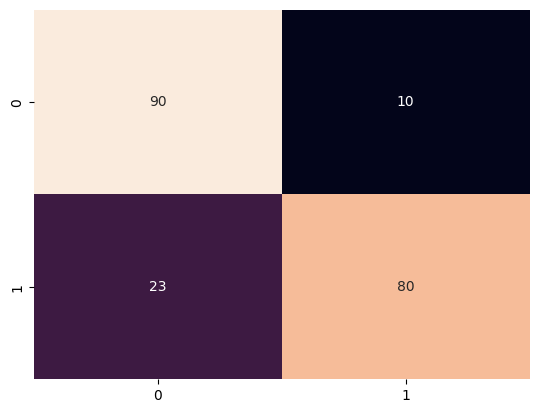

In [3]:
# asmatutako modeloa
confusion_matrix = [[90, 10], [23, 80]]

# irudikapena
im = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt='g',
    cbar=False
)


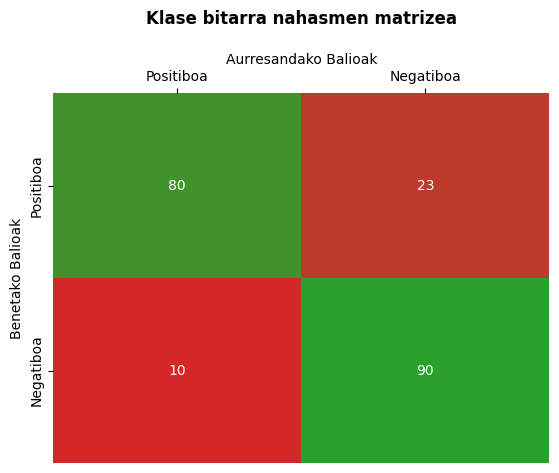

In [4]:
# asmatutako modeloa
confusion_matrix = [[90, 10], [23, 80]]

# irudikapena
im = sns.heatmap(
    confusion_matrix,
    annot=True,
    cmap=custom_palette,
    fmt='g',
    cbar=False
)

im.set_title('Klase bitarra nahasmen matrizea\n', fontweight="bold")

im.xaxis.tick_top()
im.xaxis.set_label_position('top')

im.set_xlabel('Aurresandako Balioak')
im.set_ylabel('Benetako Balioak')

im.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
im.yaxis.set_ticklabels(['Negatiboa','Positiboa'])

im.invert_xaxis()
im.invert_yaxis()

#plt.savefig('irudiak/nahasmen_matrize_adibidea.pdf', format='pdf', bbox_inches="tight")

## 2. 🔧 Tresnak

In [5]:
# hasierako importak
from sklearn.metrics import confusion_matrix

Informazio gehiago [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)ko *confusion_matrix* paketean. Edo [dokumentazioa](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) hemen.

In [6]:
real_values =       np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
predicted_values =  np.array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])
# [[TN,FN],
#  [FP,TP]]
conf = confusion_matrix(real_values, predicted_values)
conf

array([[7, 3],
       [1, 9]])

### 2.1. 📏 Modeloaren aurresate gaitasunak neurtzen

🤓 Info gehiago [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion)

Modeloen kapazitatea baloratzeko modu asko daude. Horietatik formula ezagunenak, besteak beste, *accuracy*, *precision*, *specificity*,... dira.

Guztiek nahasmen-matrizearen datuetatik eratorriak dira eta 0 eta 1 balio artean oszilatuko dira.

$ACCURACY = \frac{TP+TN}{TP+FP+FN+TN}$ ; zenbat eta altuago hobe

$RECALL = TPR = \frac{TP}{TP+FN}$ ; zenbat eta altuago hobe. Ondo egindakoen neurketa

$FPR = \frac{FP}{FP+TN}$ ; zenbat eta **baxuago** hobe

$F_1 = \frac{2TP}{2TP+FP+FN}$ ; zenbat eta altuago hobe

$PRECISION = \frac{TP}{TP+FP}$ ; zenbat eta altuago hobe. Aurresandako klase positiboko, zenbat egin diren ondo

In [7]:
def ebaluazioa_kalkulatu(TN: int, FP: int, FN: int, TP: int):
    # formulak
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP / (TP+FN)
    FPR = FP / (FP+TN)
    F1 = (2*TP) / (2*TP+FP+FN)
    # printak
    print('Accuracy:', ACC)
    print('Recall (TPR):', TPR)
    print('FPR:', FPR)
    print('F1:', F1)

In [8]:
real_values =       np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
predicted_values =  np.array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

cmat = confusion_matrix(real_values, predicted_values)

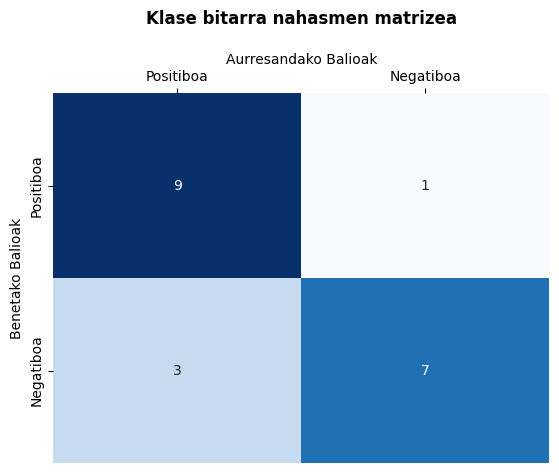

In [9]:
ax2= sns.heatmap(
    cmat,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
)

ax2.set_title('Klase bitarra nahasmen matrizea\n', fontweight="bold")

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')

ax2.set_xlabel('Aurresandako Balioak')
ax2.set_ylabel('Benetako Balioak')

ax2.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
ax2.yaxis.set_ticklabels(['Negatiboa','Positiboa'])


ax2.invert_xaxis()
ax2.invert_yaxis()

In [10]:
tn, fp, fn, tp = confusion_matrix(real_values, predicted_values).ravel().tolist()
ebaluazioa_kalkulatu(tn, fp, fn, tp)

Accuracy: 0.8
Recall (TPR): 0.9
FPR: 0.3
F1: 0.8181818181818182


### 2.2. 🔍 Erroreen identifikazioa eta analisia

In [11]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cmat.flatten()]


labels = [f'{v1}\n{v2}' for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

labels

array([['True Neg\n7', 'False Pos\n3'],
       ['False Neg\n1', 'True Pos\n9']], dtype='<U11')

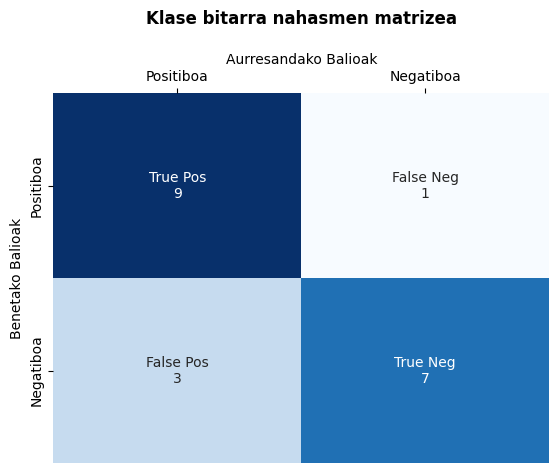

In [12]:
img= sns.heatmap(
    cmat,
    annot=labels,
    fmt="",
    cmap='Blues',
    cbar=False,
)

img.set_title('Klase bitarra nahasmen matrizea\n', fontweight="bold")

img.xaxis.tick_top()
img.xaxis.set_label_position('top')

img.set_xlabel('Aurresandako Balioak')
img.set_ylabel('Benetako Balioak')

img.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
img.yaxis.set_ticklabels(['Negatiboa','Positiboa'])


img.invert_xaxis()
img.invert_yaxis()
#plt.savefig('irudiak/nahasmen_matrize_errore_ident.pdf', format='pdf', bbox_inches="tight")

### 1.3 Modeloen konparaketa

In [13]:
real_values =       np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
predicted_values =  np.array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

cmat_1 = confusion_matrix(real_values, predicted_values)

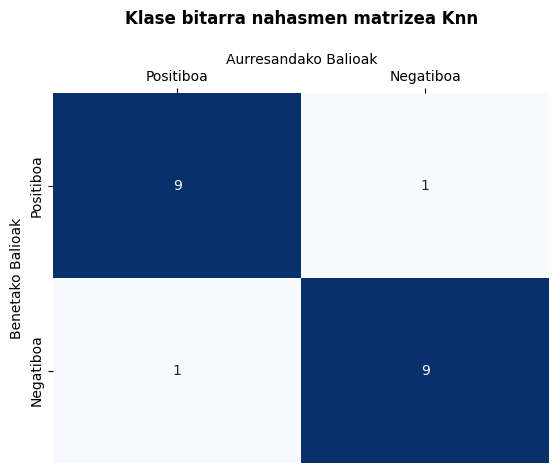

In [14]:
img= sns.heatmap(
    cmat_1,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
)

img.set_title('Klase bitarra nahasmen matrizea Knn\n', fontweight="bold")

img.xaxis.tick_top()
img.xaxis.set_label_position('top')

img.set_xlabel('Aurresandako Balioak')
img.set_ylabel('Benetako Balioak')

img.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
img.yaxis.set_ticklabels(['Negatiboa','Positiboa'])


img.invert_xaxis()
img.invert_yaxis()

In [15]:
real_values =       np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
predicted_values =  np.array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

cmat_2 = confusion_matrix(real_values, predicted_values)

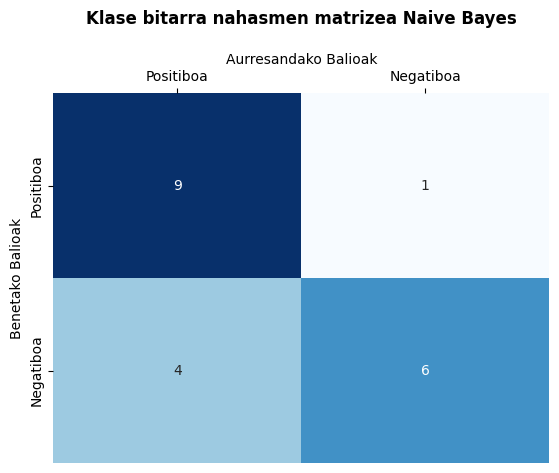

In [16]:
img= sns.heatmap(
    cmat_2,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
)

img.set_title('Klase bitarra nahasmen matrizea Naive Bayes\n', fontweight="bold")

img.xaxis.tick_top()
img.xaxis.set_label_position('top')

img.set_xlabel('Aurresandako Balioak')
img.set_ylabel('Benetako Balioak')

img.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
img.yaxis.set_ticklabels(['Negatiboa','Positiboa'])


img.invert_xaxis()
img.invert_yaxis()

FileNotFoundError: [Errno 2] No such file or directory: 'irudiak/nahasmen_matrize_modelo_konparaketa.pdf'

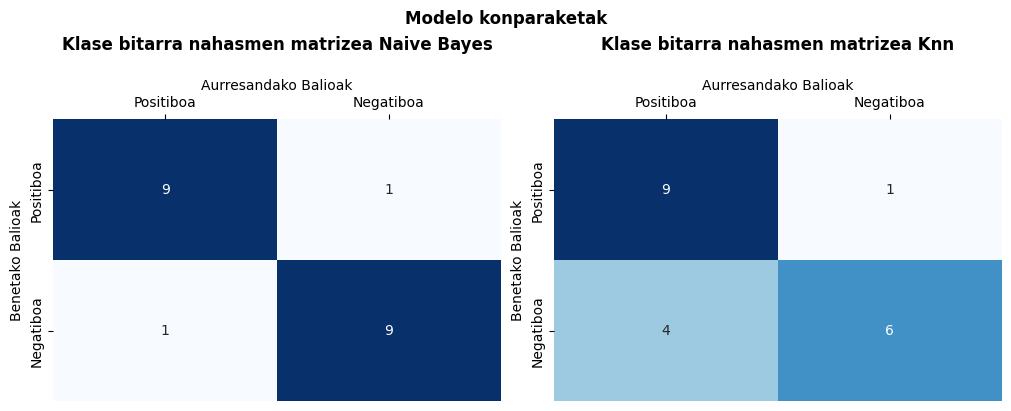

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4),layout='constrained')

fig.suptitle('Modelo konparaketak', fontweight="bold")
################################
im1= sns.heatmap(
    cmat_1,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
    ax=axs[0]
)

im1.set_title('Klase bitarra nahasmen matrizea Naive Bayes\n', fontweight="bold")

im1.xaxis.tick_top()
im1.xaxis.set_label_position('top')

im1.set_xlabel('Aurresandako Balioak')
im1.set_ylabel('Benetako Balioak')

im1.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
im1.yaxis.set_ticklabels(['Negatiboa','Positiboa'])


im1.invert_xaxis()
im1.invert_yaxis()
##################################
im2= sns.heatmap(
    cmat_2,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
    ax=axs[1]
)

im2.set_title('Klase bitarra nahasmen matrizea Knn\n', fontweight="bold")

im2.xaxis.tick_top()
im2.xaxis.set_label_position('top')

im2.set_xlabel('Aurresandako Balioak')
im2.set_ylabel('Benetako Balioak')

im2.xaxis.set_ticklabels(['Negatiboa','Positiboa'])
im2.yaxis.set_ticklabels(['Negatiboa','Positiboa'])

im2.invert_xaxis()
im2.invert_yaxis()


plt.savefig('irudiak/nahasmen_matrize_modelo_konparaketa.pdf', format='pdf', bbox_inches="tight")

## 3. 💸📋 Kostuak eta ebaluazioaren abantailak

Normalean, enpresa baten enkargua jasoko da, iragarpen-eredu bat egiteko. Enpresak jarriko ditu iragarpenetan akatsak zenbateraino onartzen dituen jakiteko baldintzak. Horretarako, datuen analistak gutxienekoak bete beharko ditu eta horiek grafikoen bidez frogatu beharko ditu.